# BUAN-670-AB Project

Please use the class lecture video (March 11) and Chapter 15 of the Data Mining for Business Analytics book as references for this project. Slides are also available in the slides folder for quick references.

The dataset on American College and University Rankings 'Universities.csv' (downloadable from https://github.com/gedeck/dmba/tree/master/datasets ; Also can be imported from the dmba package as shown often in class ) contains information on 1302 American colleges and universities offering an undergraduate program. For each university, there are 17 measurements, including continuous measurements (such as tuition and graduation rate) and categorical measurements (such as location by state and whether it is a private or public school).

Note that many records are missing some measurements. Our first goal is to estimate these missing values from "similar" records. This will be done by clustering the complete records and then finding the closest cluster for each of the partial records. The missing values will be imputed from the information in that cluster.

---------------------------------------------------------------------------------------------

**Question 1**

Remove all records with missing measurements from the dataset.

For all the continuous measurements, run hierarchical clustering using complete linkage and Euclidean distance. Make sure to normalize the measurements. From the dendrogram: How many clusters seem reasonable for describing these data?

In [5]:

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv("Universities.csv")
data.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [7]:
data.dropna(inplace=True)
# Select the continuous measurements
continuous_cols = ['# appli. rec\'d', '# appl. accepted', '# new stud. enrolled', '% new stud. from top 10%',
                   '% new stud. from top 25%', '# FT undergrad', '# PT undergrad', 'in-state tuition',
                   'out-of-state tuition', 'room', 'board', 'add. fees', 'estim. book costs',
                   'estim. personal $', '% fac. w/PHD', 'stud./fac. ratio', 'Graduation rate']
# Normalize the continuous measurements
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[continuous_cols])

# Run hierarchical clustering using complete linkage and Euclidean distance
clustering = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='complete', distance_threshold=0)
cluster_labels = clustering.fit_predict(data_scaled)


hc_df = data[continuous_cols]

In [8]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.6824374865200687.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7784284138815503.
Cophenetic correlation for Euclidean distance and average linkage is 0.8535119088803945.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7658618674370058.
Cophenetic correlation for Chebyshev distance and single linkage is 0.6342857908640065.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7327678342894288.
Cophenetic correlation for Chebyshev distance and average linkage is 0.850689078243433.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.7489629012633104.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.5867280555441857.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5012716663668577.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.5880703529449.
Cophenetic correl

In [9]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8535119088803945, which is obtained with Euclidean distance and average linkage.


In [10]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.6824374865200687.
Cophenetic correlation for complete linkage is 0.7784284138815503.
Cophenetic correlation for average linkage is 0.8535119088803945.
Cophenetic correlation for centroid linkage is 0.8244184938838878.
Cophenetic correlation for ward linkage is 0.6164916384109768.
Cophenetic correlation for weighted linkage is 0.7658618674370058.


In [11]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print()
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)


Highest cophenetic correlation is 0.8535119088803945, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**


**Let's view the dendrograms for the different linkage methods.**

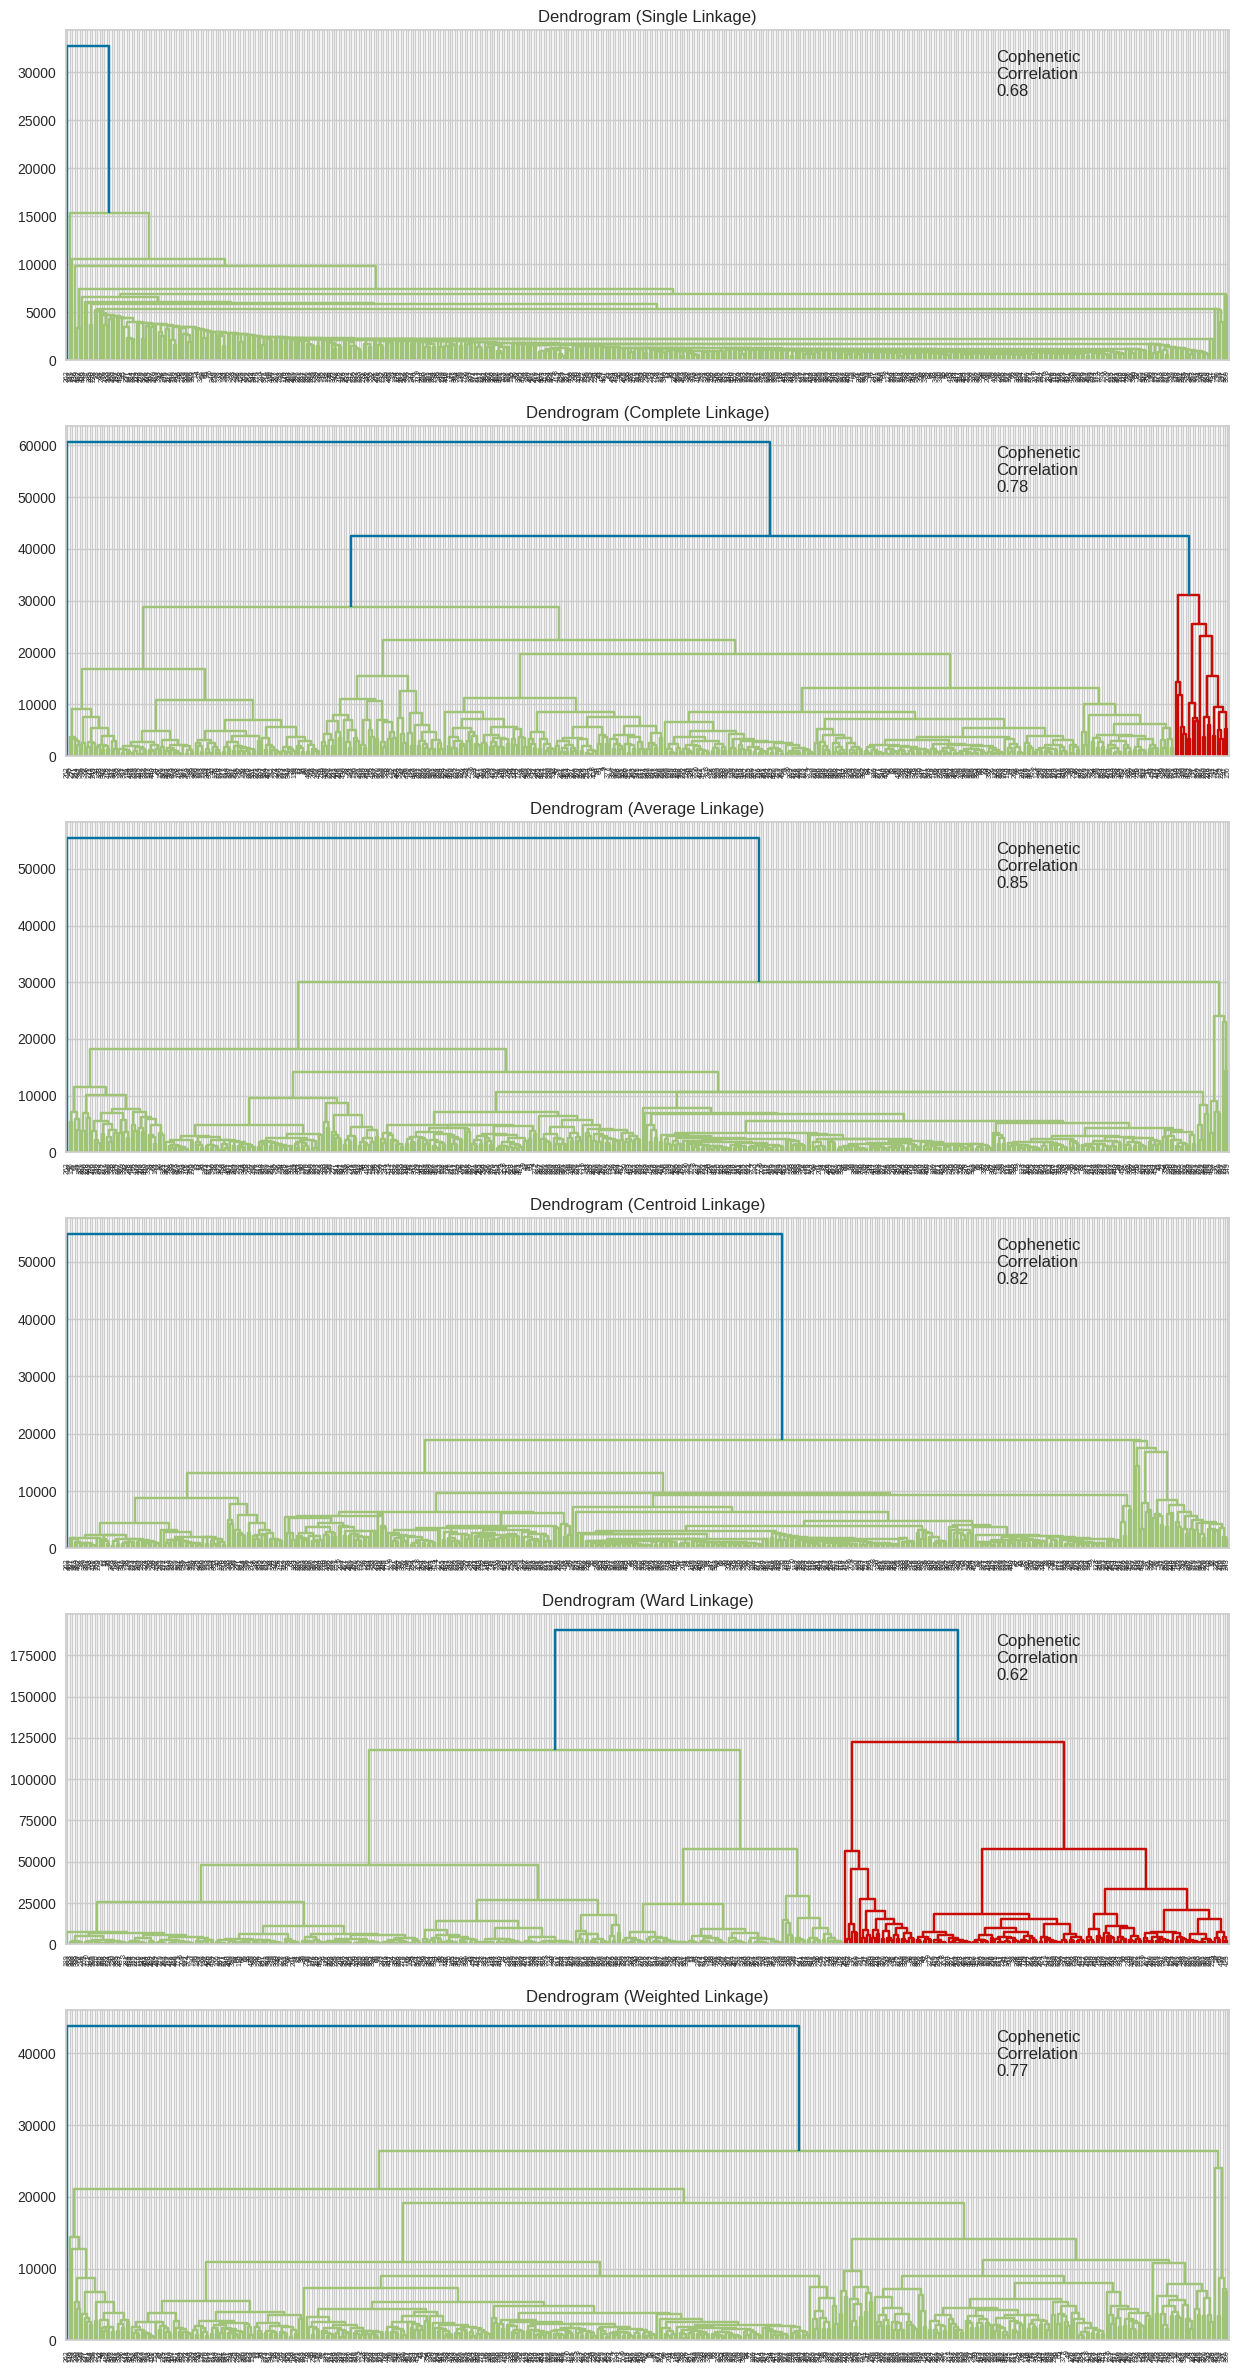

In [12]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Dendrogram with average linkage shows distinct and separate cluster tree.**

In [13]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.616492
0,single,0.682437
5,weighted,0.765862
1,complete,0.778428
3,centroid,0.824418
2,average,0.853512


#### Lets check silhouette score

In [14]:
sil_score_hc = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
    preds = clusterer.fit_predict((hc_df))
    score = silhouette_score(hc_df, preds)
    sil_score_hc.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7824834671107972
For n_clusters = 3, silhouette score is 0.546212711307181
For n_clusters = 4, silhouette score is 0.44869917381692337
For n_clusters = 5, silhouette score is 0.3628506047208625
For n_clusters = 6, silhouette score is 0.343569668286731
For n_clusters = 7, silhouette score is 0.33806424559271525
For n_clusters = 8, silhouette score is 0.34294562330085515
For n_clusters = 9, silhouette score is 0.3927167074082312


From the silhouette scores, it seems that 2 is a good value for k. So lets use k=2

In [15]:
HCmodel = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average')

In [16]:
# creating a copy of the original data
df2 = data.copy()

hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [17]:
hc_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_

In [18]:
cluster_labels = HCmodel.labels_
num_clusters = 2

Question 2

Compare the summary statistics for each cluster and describe each cluster in this context (e.g., "Universities with high tuition, low acceptance rate...").

In [19]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [20]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["College Name"].count().values
)

In [21]:
hc_cluster_profile

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate,HC_Clusters,count_in_each_segment
HC_segments,,,,,,,,,,,,,,,,,,,,
0,1.729787,3051.67234,2011.323404,772.748936,27.995745,55.602128,3524.985106,791.253191,9418.904255,10581.895745,2219.919149,2122.229787,377.693617,548.482979,1310.457447,73.17234,13.950851,65.538298,0.0,470
1,1.000000,48094.00000,26330.000000,4520.000000,36.000000,79.000000,21401.000000,3712.000000,3640.000000,7410.000000,2780.000000,1986.000000,1003.000000,690.000000,2009.000000,90.00000,19.500000,77.000000,1.0,1


In [22]:
import pandas as pd

# Add the cluster labels to the dataset
data['Cluster'] = cluster_labels

# Compute summary statistics for each cluster
cluster_summary = data.groupby('Cluster').describe()

# Display the summary statistics for each cluster
for cluster in range(num_clusters):
    print(f"Cluster {cluster+1}:")
    print(cluster_summary.loc[cluster])
    print()


Cluster 1:
Public (1)/ Private (2)   count      470.000000
                          mean         1.729787
                          std          0.444543
                          min          1.000000
                          25%          1.000000
                          50%          2.000000
                          75%          2.000000
                          max          2.000000
# appli. rec'd            count      470.000000
                          mean      3051.672340
                          std       3508.445395
                          min         77.000000
                          25%        801.000000
                          50%       1638.500000
                          75%       3846.250000
                          max      20192.000000
# appl. accepted          count      470.000000
                          mean      2011.323404
                          std       2241.393482
                          min         61.000000
                          25%

**Question 3**

Use the categorical measurements that were not used in the analysis (State and Private/Public) to characterize the different clusters. Is there any relationship between the clusters and the categorical information?

In [23]:
# Characterize the clusters using categorical measurements
categorical_cols = ['State', 'Public (1)/ Private (2)']

for col in categorical_cols:
    cross_tab = pd.crosstab(data[col], data['Cluster'])
    print(f"\nCross-tabulation for {col}:")
    print(cross_tab)




Cross-tabulation for State:
Cluster   0  1
State         
AK        2  0
AL        4  0
AR        4  0
AZ        2  0
CA       15  0
CO        6  0
CT       10  0
DC        4  0
DE        2  0
FL        8  0
GA        7  0
HI        1  0
IA       18  0
ID        2  0
IL       15  0
IN       15  0
KS        7  0
KY        6  0
LA        5  0
MA       22  0
MD        3  0
ME        6  0
MI       13  0
MN       11  0
MO       15  0
MS        5  0
MT        2  0
NC       23  0
ND        5  0
NE        7  0
NH        6  0
NJ       12  1
NM        2  0
NY       38  0
OH       24  0
OK        6  0
OR        5  0
PA       42  0
RI        4  0
SC        9  0
SD        4  0
TN       15  0
TX       20  0
UT        2  0
VA       15  0
VT        7  0
WA        2  0
WI        9  0
WV        2  0
WY        1  0

Cross-tabulation for Public (1)/ Private (2):
Cluster                    0  1
Public (1)/ Private (2)        
1                        127  1
2                        343  0


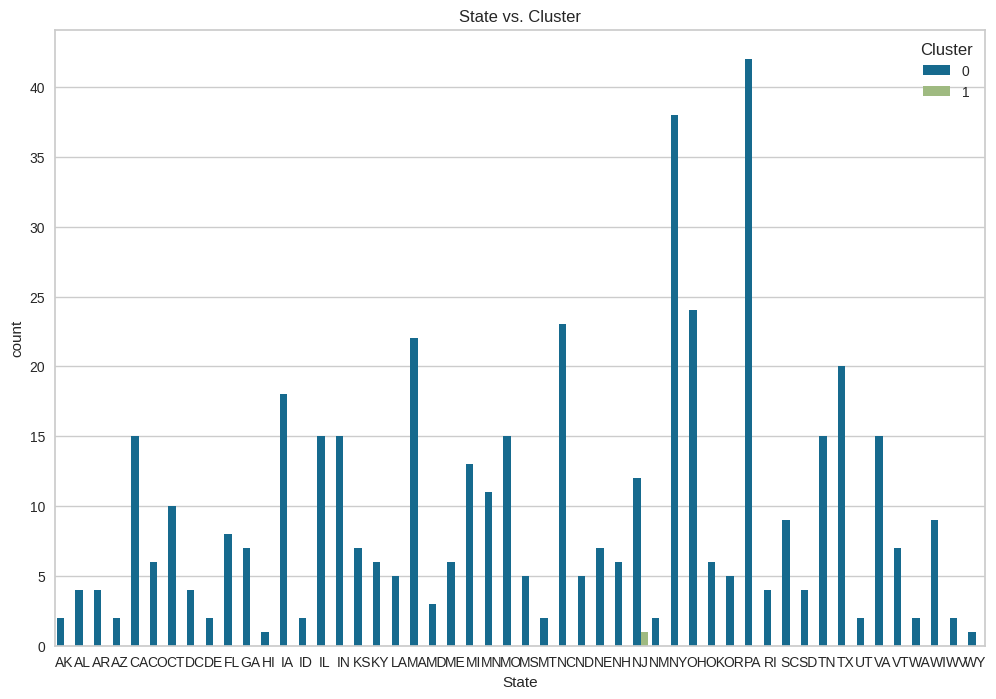

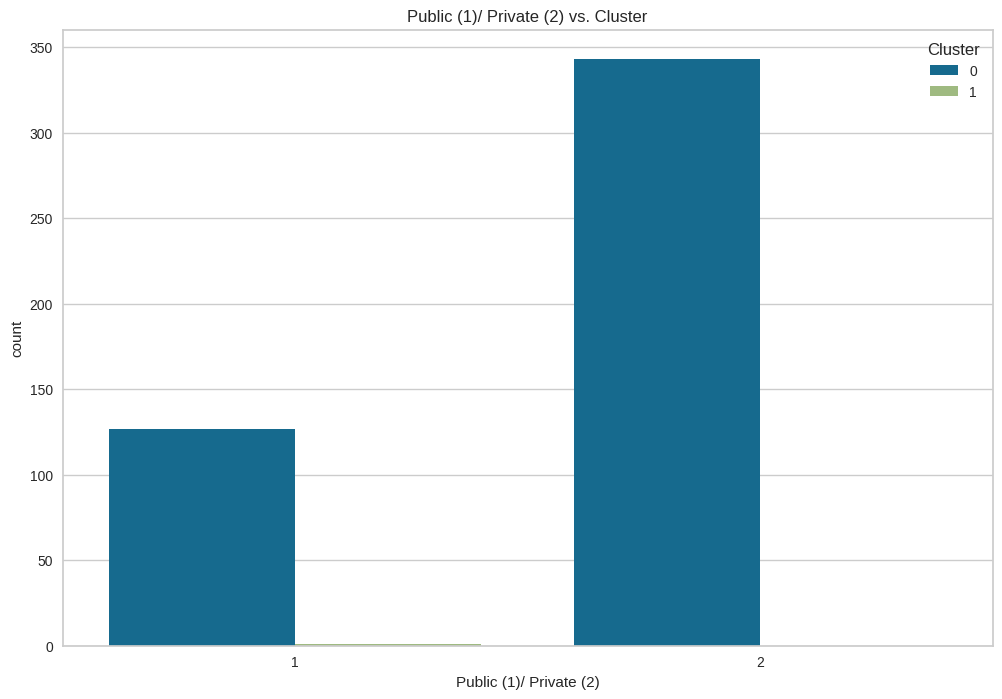

In [24]:
# Visualize the relationship between clusters and categorical information
for col in categorical_cols:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=col, hue='Cluster', data=data)
    plt.title(f'{col} vs. Cluster')
    plt.show()


**Question 4**

What other external information can explain the contents of some or all of these clusters?

To learn more about the factors that contribute to the formation of clusters, we can analyze additional variables that are not included in the given dataset. This may involve researching external data sources related to universities, such as rankings, geographical location, funding, and student demographics. By integrating this additional information with the existing dataset, we can gain a deeper understanding of the factors that influence how universities are grouped together.

**Question 5**

Consider Tufts University, which is missing some information. Compute the Euclidean distance of this record from each of the clusters that you found above (using only the measurements that you have). Which cluster is it closest to? Impute the missing values for Tufts by taking the average of the cluster on those measurements.

In [25]:
df3 = pd.read_csv("Universities.csv")
# data = df3

In [26]:
tuft_Df = df3[df3['College Name'] == 'Tufts University']

In [27]:
continuous_cols_tf = ["# appli. rec'd",
 '# appl. accepted',
 '# new stud. enrolled',
 '% new stud. from top 10%',
 '% new stud. from top 25%',
 '# FT undergrad',
 'in-state tuition',
 'out-of-state tuition',
 'room',
 'board',
 'add. fees',
 'estim. book costs',
 'estim. personal $',
 '% fac. w/PHD',
 'stud./fac. ratio',
 'Graduation rate']

In [28]:
# Calculate the cluster centroids
cluster_centroids = []
for i in range(num_clusters):
    centroid = np.mean(data[continuous_cols].loc[cluster_labels == i], axis=0)
    cluster_centroids.append(centroid)

# Convert the cluster centroids to a NumPy array
cluster_centroids = np.array(cluster_centroids)

In [29]:
import numpy as np

# Select the Tufts University record
tufts = df3[df3['College Name'] == 'Tufts University']

# Calculate the Euclidean distance between Tufts University and each cluster centroid
distances = np.linalg.norm(cluster_centroids - tufts[continuous_cols].values, axis=1)

# Find the index of the closest cluster centroid
closest_cluster_index = np.argmin(distances)

print("Tufts University is closest to Cluster", closest_cluster_index)


Tufts University is closest to Cluster 0


In [30]:
# Mean value of exisiting cluster
avg_val = hc_df[hc_df.HC_Clusters==0]['# PT undergrad'].mean()

In [31]:
# Impute missing values in the "# PT undergrad" feature
tuft_Df['# PT undergrad'] = tuft_Df['# PT undergrad'].fillna(avg_val)


In [32]:
tuft_Df

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
475,Tufts University,MA,2,7614.0,3605.0,1205.0,60.0,90.0,4598.0,791.253191,19701.0,19701.0,3038.0,2930.0,503.0,600.0,928.0,99.0,10.3,92.0


In [33]:
# Fill missing values in the '# PT undergrad' column for Tufts University
df3.loc[df3['College Name'] == 'Tufts University', '# PT undergrad'] = df3.loc[df3['College Name'] == 'Tufts University', '# PT undergrad'].fillna(avg_val)

In [34]:
df3.loc[df3['College Name'] == 'Tufts University']

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
475,Tufts University,MA,2,7614.0,3605.0,1205.0,60.0,90.0,4598.0,791.253191,19701.0,19701.0,3038.0,2930.0,503.0,600.0,928.0,99.0,10.3,92.0
